In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
%matplotlib inline

In [2]:
#https://www.kaggle.com/c/titanic/data
data_train = pd.read_csv("titanic_train.csv")

In [3]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# porcentagem dos dados faltantes no conjunto de treino
data_train.isna().mean().round(4) * 100

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [5]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


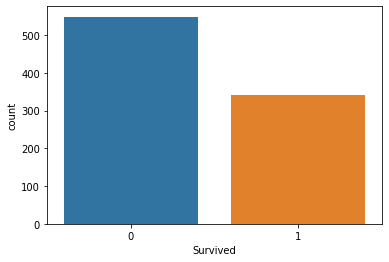

In [6]:
sns.countplot("Survived",data=data_train)
print(data_train["Survived"].value_counts())

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explic

<AxesSubplot:xlabel='Survived', ylabel='count'>

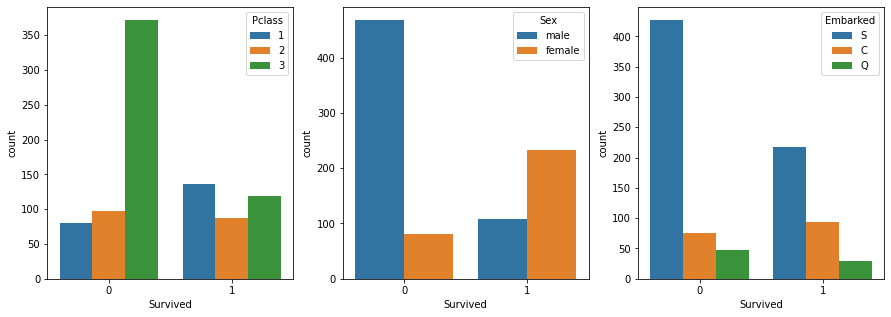

In [7]:
fig, ax =plt.subplots(1,3,figsize=(15,5))
sns.countplot("Survived",hue="Pclass",data=data_train,ax=ax[0])
sns.countplot("Survived",hue="Sex",data=data_train,ax=ax[1])
sns.countplot("Survived",hue="Embarked",data=data_train,ax=ax[2])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


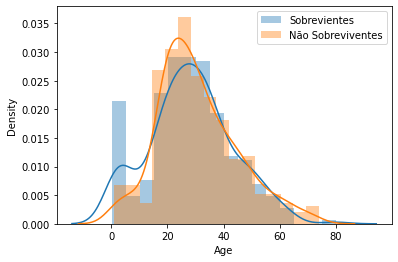

In [8]:
sns.distplot(data_train[data_train["Survived"]==1]["Age"],label="Sobrevientes")
sns.distplot(data_train[data_train["Survived"]==0]["Age"],label = "Não Sobreviventes")
plt.legend()

In [9]:
def plot_correlation(corr_matrix, figsize):
    f, ax = plt.subplots(figsize=figsize)
    mask = np.zeros_like(corr_matrix, dtype=np.bool)
    mask[np.triu_indices_from(mask)]= True
    heatmap = sns.heatmap(corr_matrix,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4,
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

    #add the column names as labels
    ax.set_yticklabels(corr_matrix.columns, rotation = 0)
    ax.set_xticklabels(corr_matrix.columns)

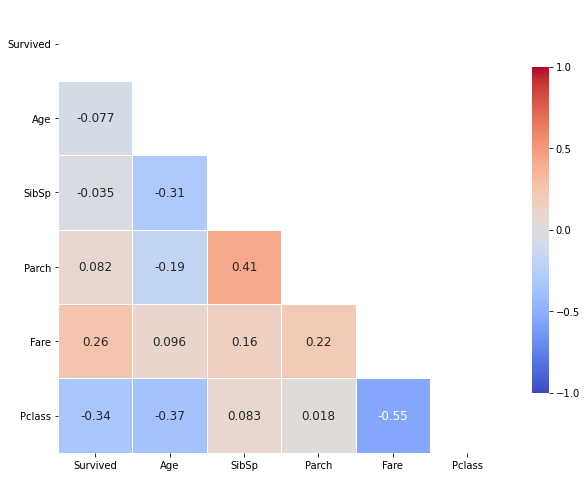

In [10]:
plot_correlation(data_train[["Survived","Age","SibSp","Parch","Fare","Pclass"]].corr(),(10,15))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

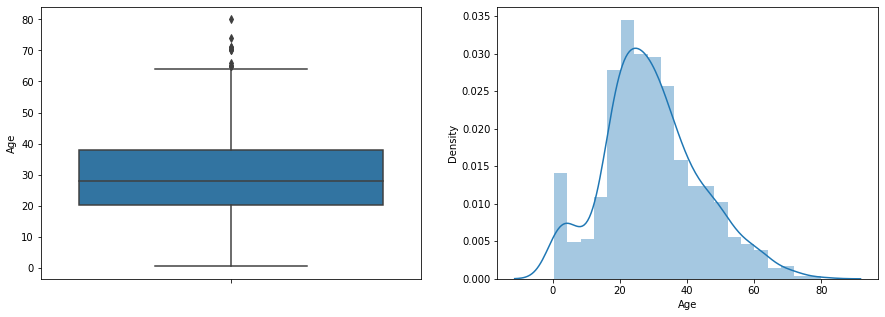

In [11]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
sns.boxplot(y="Age",data=data_train,ax=ax[0])
sns.distplot(data_train["Age"],ax=ax[1])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

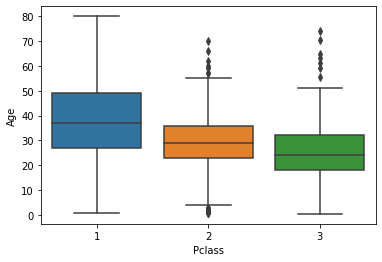

In [12]:
sns.boxplot("Pclass","Age",data=data_train)

In [13]:
def imputar_idade(data):
    if pd.isnull(data["Age"]):
        if data["Pclass"] == 1:
            return 38
        elif data["Pclass"] == 2:
            return 29
        else:
            return 25
    else:
        return data["Age"]
print(data_train.groupby("Pclass")["Age"].mean())
print(data_train[data_train["Age"].isna()].groupby("Pclass").size())
data_train["Age"] = data_train.apply(imputar_idade,axis=1)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
Pclass
1     30
2     11
3    136
dtype: int64


In [14]:
sex = pd.get_dummies(data_train['Sex'],drop_first=True)
embark = pd.get_dummies(data_train['Embarked'],drop_first=True)

data_train.drop(["PassengerId","Name","Ticket","Cabin","Sex","Embarked"],axis=1,inplace=True)

data_train = pd.concat([data_train,sex,embark],axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data_train.drop('Survived',axis=1), 
                                                    data_train['Survived'], test_size=0.30)

In [16]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
logmodel_acc = round(logmodel.score(X_test, y_test) * 100, 2)
print("Score: ", logmodel_acc)

Score:  79.85


In [18]:
pickle.dump(logmodel, open('model.pkl','wb'))